In [1]:
#Import the libraries
import numpy as np
import pandas as pd

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
import category_encoders as ce

import matplotlib.pyplot as plt

In [2]:
#Change the path to the Location of the file
path="D:\\Personal\\Alex\\Uni\\MS IA\\1 Curso\\FALL\\Auto.Mach.Learn\\Practical Challenges\\M1 Practical Challenge - Hotel Booking Data Preprocessing\\hotel_bookings.csv"

In [3]:
#Lets open de CSV file and create a Data Frame
df = pd.read_csv( path)
df_original=df.copy()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# Understanding of the data

The dataframe have almost 120,000 rows and 32 variables.

Now let's  go one by one

# Variable 1: Hotel

This variable indicates the type of hotel. resort or city

In [4]:
df.hotel.dtypes

dtype('O')

In [5]:
df.hotel.isnull().sum()

0

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


<AxesSubplot:>

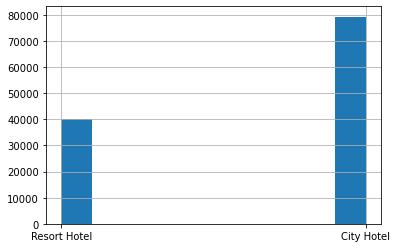

In [6]:
print(df.hotel.value_counts())
df["hotel"].hist()

##### As we can see the type of the variable is an 'Object' and there are no 'null' values.

##### Even Though this column is an object it can be define as a String. Thats mean its a Categorical Data and thus we need to apply some sort of transformation.

##### The variable Hotel is Nominal data, and we cannot apply 'Label encoding'. 

##### For that is better to use One-hot encoding, and since this variable only have 2 values, we need to create only two columns

In [7]:
df=pd.get_dummies(df, columns=["hotel"], prefix=["hotel"] )
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,342,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
1,0,737,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
2,0,7,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
3,0,13,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,0,14,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,2017,August,35,30,2,5,2,0.0,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,0,102,2017,August,35,31,2,5,3,0.0,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,0,34,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,0,109,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


Shape:  (119390, 33)
Type of hotel_City Hotel:  uint8
Type of hotel_Resort Hotel:  uint8


array([[<AxesSubplot:title={'center':'hotel_City Hotel'}>,
        <AxesSubplot:title={'center':'hotel_Resort Hotel'}>]],
      dtype=object)

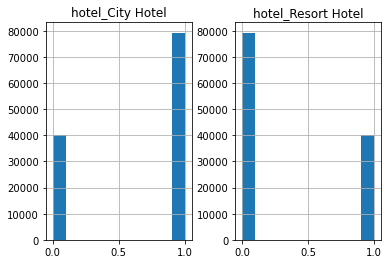

In [8]:

#If we now check the shape of the df, we can see we have 33 columns instead of 32. 
#That its because we have changed the column 'hotel' for the columns 'hotel_City Hotel' and 'hotel_Resort Hotel' with ints values
print("Shape: ",df.shape)
print("Type of hotel_City Hotel: ", df['hotel_City Hotel'].dtypes)
print("Type of hotel_Resort Hotel: ", df['hotel_Resort Hotel'].dtypes)

df[df.dtypes[(df.columns=="hotel_City Hotel")|(df.columns=="hotel_Resort Hotel")].index.values].hist()

# Variable 2: is_canceled


This variable represents whether the reservation has been canceled or not. 1 means it has been canceled. 0 means it has not been canceled

In [9]:
print("'is_canceled' Type:\t",df.is_canceled.dtypes)
print("Number of nulls:\t",df.is_canceled.isnull().sum())

'is_canceled' Type:	 int64
Number of nulls:	 0


0    75166
1    44224
Name: is_canceled, dtype: int64


<AxesSubplot:>

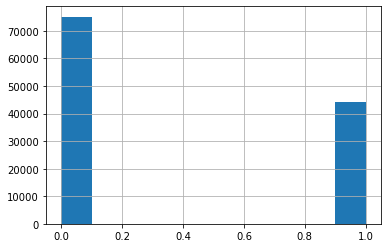

In [10]:
print(df.is_canceled.value_counts())
df["is_canceled"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We also see there is only two values, 0 and 1. Thus there are no outliers and no other operation is needed. Like standardization or normalization.


# Variable 3: lead_time

This variable represents the difference time in days, since the reservation was made and the arrival date

In [11]:
df.lead_time

0         342
1         737
2           7
3          13
4          14
         ... 
119385     23
119386    102
119387     34
119388    109
119389    205
Name: lead_time, Length: 119390, dtype: int64

In [12]:
print("'lead_time' Type:\t",df.lead_time.dtypes)
print("Number of nulls:\t",df.lead_time.isnull().sum())

'lead_time' Type:	 int64
Number of nulls:	 0


0      6345
1      3460
2      2069
3      1816
4      1715
       ... 
370       1
435       1
371       1
380       1
709       1
Name: lead_time, Length: 479, dtype: int64


<AxesSubplot:>

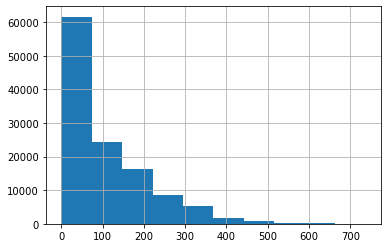

In [13]:
print(df.lead_time.value_counts())
df["lead_time"].hist()


##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We also need to scale the data of this variable. Since the variable do not follow a Gaussian distribution is better to use 'Min-max normalization'

##### Before scaling, we need to check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea519fca90>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea51a0c0a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea519fc1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea519f5ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea519f51f0>],
 'means': []}

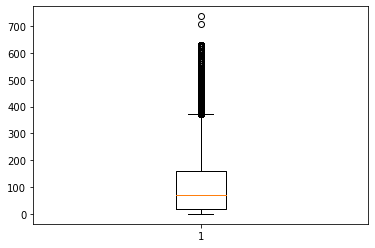

In [14]:
#First lets see a 'box and whisker' graph to find the outliers. As we can see there are a couple of outliers
plt.boxplot(df.lead_time)

In [15]:
# Code from 'Hands-On Automated Machine Learning', page 142
#Instead of using 1.5 IQR, Im using 2, so the range is bigger

## IQR Method Outlier Detection and Removal(filter) ##
quartile75, quartile25 = np.percentile(df.lead_time, [75 ,25])
## Inter Quartile Range ##
IQR = quartile75 - quartile25
print("IQR",IQR)
## Calculate Min and Max values ##
min_value = quartile25 - (IQR*2)
max_value = quartile75 + (IQR*2)
print("Max", max_value)
print("Min", min_value)


IQR 142.0
Max 444.0
Min -266.0


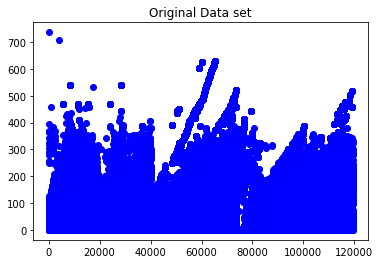

In [16]:
#We can see here the original data, as we can see, there are a couple of outliers data points

# Code from 'Hands-On Automated Machine Learning', page 140
plt.cla()
plt.figure(1)
plt.title("Original Data set")
plt.scatter(range(len(df.lead_time)),df.lead_time,c='b')


Nulls:  1178
%:  0.9866823017003099


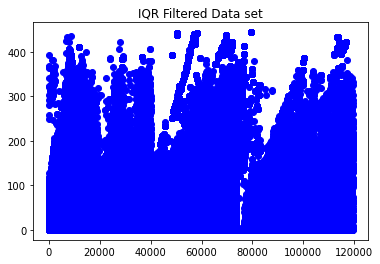

In [17]:
#Now lets see the data without the outliers, less than 1% of the points are consider outliers

# Code from 'Hands-On Automated Machine Learning', page 143
filtered_values = df.lead_time.copy()
filtered_values[ filtered_values< min_value] = np.nan
filtered_values[ filtered_values > max_value] = np.nan
#Check filtered data
plt.cla()
plt.figure(1)
plt.title("IQR Filtered Data set")
plt.scatter(range(len(filtered_values)),filtered_values,c='b')



nulls=filtered_values.isnull().sum()
print("Nulls: ",nulls)
print("%: ",(nulls/119390)*100)

In [18]:
#Lets update the dataset
df['lead_time']=filtered_values

#Now we have some nulls values on the DF, since there are lower than 5 % we can delete them.
df=df.dropna(axis=0,subset=['lead_time'])

#Lets see if the null have been deleted
print("Number of nulls:\t",df.lead_time.isnull().sum())
df

Number of nulls:	 0


,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,342.0,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
2,0,7.0,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
3,0,13.0,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,0,14.0,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
5,0,14.0,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23.0,2017,August,35,30,2,5,2,0.0,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,0,102.0,2017,August,35,31,2,5,3,0.0,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,0,34.0,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,0,109.0,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


##### Now that we have dealt with the outliers, we need to normalize, for that we are going to use the 'min-max normalization'

Number of nulls:	 0


<ipython-input-19-8a58b30c1c41>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lead_time']=lead_time_copy


<AxesSubplot:>

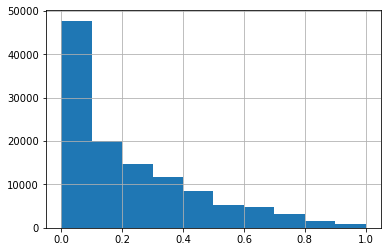

In [19]:

minmax=MinMaxScaler()
lead_time_copy=minmax.fit_transform(pd.DataFrame(df['lead_time']))
df['lead_time']=lead_time_copy


#Lets see if there are any nulls values
print("Number of nulls:\t",df.lead_time.isnull().sum())
df["lead_time"].hist()




##### As we can see, there are no nulls values. And the histogram show that the data is normalized

In [20]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,0.770270,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
2,0,0.015766,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
3,0,0.029279,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,0,0.031532,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
5,0,0.031532,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,August,35,30,2,5,2,0.0,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,0,0.229730,2017,August,35,31,2,5,3,0.0,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,0,0.076577,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,0,0.245495,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


# Variable 4: arrival_date_year

This variable represents the year of the arrival date

In [21]:
df.arrival_date_year

0         2015
2         2015
3         2015
4         2015
5         2015
          ... 
119385    2017
119386    2017
119387    2017
119388    2017
119389    2017
Name: arrival_date_year, Length: 118212, dtype: int64

In [22]:
print("'arrival_date_year' Type:\t",df.arrival_date_year.dtypes)
print("Number of nulls:\t",df.arrival_date_year.isnull().sum())

'arrival_date_year' Type:	 int64
Number of nulls:	 0


2016    56199
2017    40022
2015    21991
Name: arrival_date_year, dtype: int64


<AxesSubplot:>

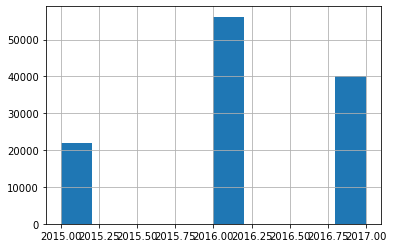

In [23]:
print(df.arrival_date_year.value_counts())
df["arrival_date_year"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We don't need to apply any transformation to this variable

In [24]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,hotel_City Hotel,hotel_Resort Hotel
0,0,0.770270,2015,July,27,1,0,0,2,0.0,...,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,0,1
2,0,0.015766,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
3,0,0.029279,2015,July,27,1,0,1,1,0.0,...,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,0,1
4,0,0.031532,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
5,0,0.031532,2015,July,27,1,0,2,2,0.0,...,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,August,35,30,2,5,2,0.0,...,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,1,0
119386,0,0.229730,2017,August,35,31,2,5,3,0.0,...,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,1,0
119387,0,0.076577,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,1,0
119388,0,0.245495,2017,August,35,31,2,5,2,0.0,...,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,1,0


# Variable 5: arrival_date_month

This variable represents the month of the arrival date

In [25]:
df.arrival_date_month

0           July
2           July
3           July
4           July
5           July
           ...  
119385    August
119386    August
119387    August
119388    August
119389    August
Name: arrival_date_month, Length: 118212, dtype: object

In [26]:
print("'arrival_date_month' Type:\t",df.arrival_date_month.dtypes)
print("Number of nulls:\t",df.arrival_date_month.isnull().sum())

'arrival_date_month' Type:	 object
Number of nulls:	 0


August       13681
July         12471
May          11687
April        11089
October      10971
June         10903
September    10450
March         9709
February      7999
November      6696
December      6695
January       5861
Name: arrival_date_month, dtype: int64


<AxesSubplot:>

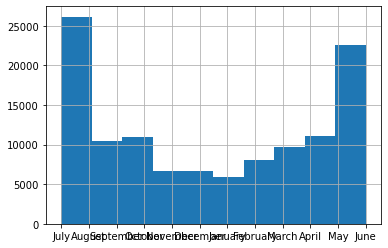

In [27]:
print(df.arrival_date_month.value_counts())
df["arrival_date_month"].hist()

##### As we can see the type of the variable is an 'Object' and there are no 'null' values.

##### We need to transform this variable into a readable one. Since month are not ordinal categorical data, we cant use 'label encoding'. For that it will be using one hot encoding. We just repeat the steps on variable 1

In [28]:
df=pd.get_dummies(df, columns=["arrival_date_month"], prefix=["arrival_date_month"] )
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,35,31,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


Number of nulls:
 arrival_date_month_April        0
arrival_date_month_August       0
arrival_date_month_December     0
arrival_date_month_February     0
arrival_date_month_January      0
arrival_date_month_July         0
arrival_date_month_June         0
arrival_date_month_March        0
arrival_date_month_May          0
arrival_date_month_November     0
arrival_date_month_October      0
arrival_date_month_September    0
dtype: int64


array([[<AxesSubplot:title={'center':'arrival_date_month_April'}>,
        <AxesSubplot:title={'center':'arrival_date_month_August'}>,
        <AxesSubplot:title={'center':'arrival_date_month_December'}>],
       [<AxesSubplot:title={'center':'arrival_date_month_February'}>,
        <AxesSubplot:title={'center':'arrival_date_month_January'}>,
        <AxesSubplot:title={'center':'arrival_date_month_July'}>],
       [<AxesSubplot:title={'center':'arrival_date_month_June'}>,
        <AxesSubplot:title={'center':'arrival_date_month_March'}>,
        <AxesSubplot:title={'center':'arrival_date_month_May'}>],
       [<AxesSubplot:title={'center':'arrival_date_month_November'}>,
        <AxesSubplot:title={'center':'arrival_date_month_October'}>,
        <AxesSubplot:title={'center':'arrival_date_month_September'}>]],
      dtype=object)

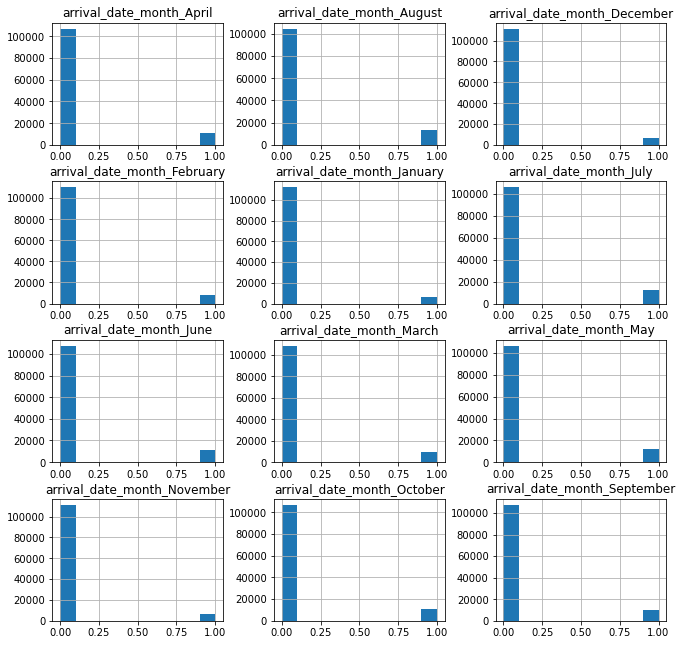

In [29]:
#Now lets check for nulls again, and check the histograms
print("Number of nulls:\n",df.filter(regex=("arrival_date_month_")).isnull().sum())
df.filter(regex=("arrival_date_month_")).hist(figsize=[11,11])


##### As we can see, there are no nulls values. And the months are store as numbers¶

In [30]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,27,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,27,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,27,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,35,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,35,31,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,35,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable 6: arrival_date_week_number

This variable represents the week of the arrival date

In [31]:
df.arrival_date_week_number

0         27
2         27
3         27
4         27
5         27
          ..
119385    35
119386    35
119387    35
119388    35
119389    35
Name: arrival_date_week_number, Length: 118212, dtype: int64

In [32]:
print("'arrival_date_week_number' Type:\t",df.arrival_date_week_number.dtypes)
print("Number of nulls:\t",df.arrival_date_week_number.isnull().sum())

'arrival_date_week_number' Type:	 int64
Number of nulls:	 0


33    3570
30    3006
32    2980
34    2940
18    2926
17    2805
21    2804
28    2791
29    2753
20    2732
31    2731
42    2724
15    2689
41    2667
38    2661
25    2653
27    2653
23    2621
35    2583
39    2581
22    2545
24    2472
16    2405
19    2402
13    2399
26    2365
40    2338
43    2275
14    2264
37    2229
44    2225
8     2199
36    2166
10    2132
9     2099
7     2092
12    2066
11    2053
45    1924
53    1799
49    1765
47    1668
46    1527
6     1491
50    1488
48    1487
4     1470
5     1370
3     1302
2     1201
52    1178
1     1030
51     916
Name: arrival_date_week_number, dtype: int64


<AxesSubplot:>

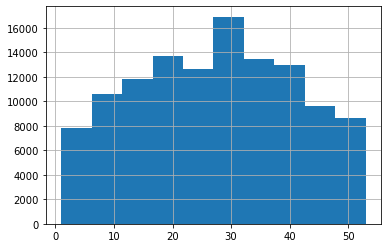

In [33]:
print(df.arrival_date_week_number.value_counts())
df["arrival_date_week_number"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We need to scale the data, in this case im going to use standardization, since it resemble  a Gaussian distribution.

Number of nulls:	 0


<AxesSubplot:>

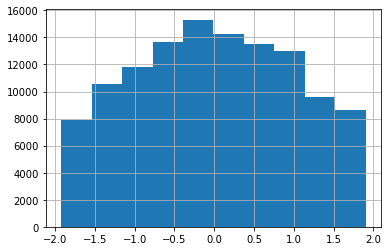

In [34]:
scaler = StandardScaler()
arrival_date_week_number_copy=scaler.fit_transform(pd.DataFrame(df['arrival_date_week_number']))
df['arrival_date_week_number']=arrival_date_week_number_copy


#Lets see if there are any nulls values
print("Number of nulls:\t",df.arrival_date_week_number.isnull().sum())
df["arrival_date_week_number"].hist()

##### There are no Null values, and the standardization has been completed correctly

In [35]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,1,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,1,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,1,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,30,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,31,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,31,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable 7: arrival_date_day_of_month

This variable represents the day of the month of the arrival date

In [36]:
df.arrival_date_day_of_month

0          1
2          1
3          1
4          1
5          1
          ..
119385    30
119386    31
119387    31
119388    31
119389    29
Name: arrival_date_day_of_month, Length: 118212, dtype: int64

In [37]:
print("'arrival_date_day_of_month' Type:\t",df.arrival_date_day_of_month.dtypes)
print("Number of nulls:\t",df.arrival_date_day_of_month.isnull().sum())

'arrival_date_day_of_month' Type:	 int64
Number of nulls:	 0


17    4333
5     4300
15    4143
26    4056
25    4052
9     4039
19    4035
2     4020
16    4014
18    3992
20    3984
24    3975
12    3971
28    3921
8     3891
30    3836
3     3835
14    3819
6     3801
27    3770
4     3753
21    3752
13    3713
7     3635
11    3589
23    3582
22    3579
1     3572
10    3558
29    3485
31    2207
Name: arrival_date_day_of_month, dtype: int64


<AxesSubplot:>

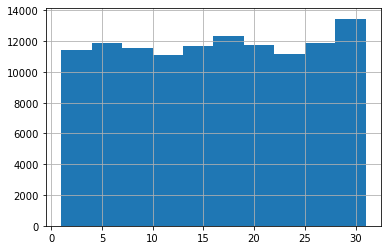

In [38]:
print(df.arrival_date_day_of_month.value_counts())
df["arrival_date_day_of_month"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We need to scale the data, in this case im going to use normalization. Like on variable 3

In [39]:
#Lets create a function that implements this min-max normalization, in case is needed somewhere else

def min_max_normalization(variable):
    minmax=MinMaxScaler()
    normalization_copy=minmax.fit_transform(pd.DataFrame(df[variable]))
    df[variable]=normalization_copy

Number of nulls:	 0


<AxesSubplot:>

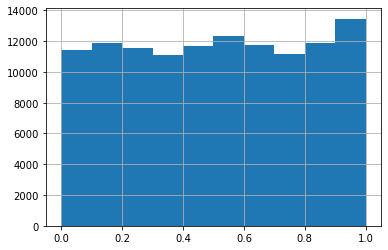

In [40]:

min_max_normalization('arrival_date_day_of_month')

#Lets see if there are any nulls values
print("Number of nulls:\t",df.arrival_date_day_of_month.isnull().sum())
df["arrival_date_day_of_month"].hist()

##### There are no Null values, and the normalization has been completed correctly

In [41]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,2,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,2,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable 8: stays_in_weekend_nights

This variable represents the numbers of days of weekend(Saturday or Sunday) that were booked

In [42]:
df.stays_in_weekend_nights

0         0
2         0
3         0
4         0
5         0
         ..
119385    2
119386    2
119387    2
119388    2
119389    2
Name: stays_in_weekend_nights, Length: 118212, dtype: int64

In [43]:
print("'stays_in_weekend_nights' Type:\t",df.stays_in_weekend_nights.dtypes)
print("Number of nulls:\t",df.stays_in_weekend_nights.isnull().sum())

'stays_in_weekend_nights' Type:	 int64
Number of nulls:	 0


0     51116
2     33109
1     30532
4      1855
3      1257
6       153
5        79
8        59
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64


<AxesSubplot:>

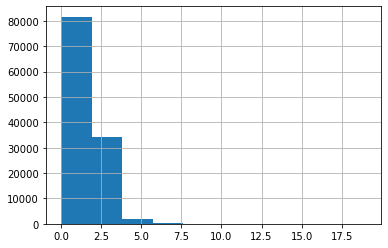

In [44]:
print(df.stays_in_weekend_nights.value_counts())
df["stays_in_weekend_nights"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We need to scale the data, in this case im going to use normalization. Like on variable 3.

##### But first we need to check for outliers 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea54a89e80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea54a98580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea54a89be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea54a98c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea54a98f40>],
 'means': []}

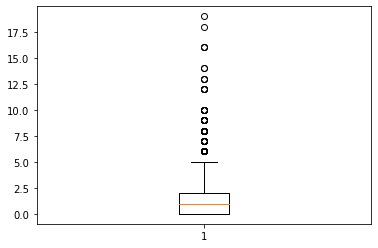

In [45]:
#First lets see a 'box and whisker' graph to find the outliers. As we can see there are a couple of outliers
plt.boxplot(df.stays_in_weekend_nights)

##### There are a couple of outliers, so we need to remove them.

In [46]:
#Lets create a couple of functions that implements this, in case is needed somewhere else 

def scatter_origianl_data(variable):
    # Code from 'Hands-On Automated Machine Learning', page 140
    plt.cla()
    plt.figure(1)
    plt.title("Original Data set")
    plt.scatter(range(len(df[variable])),df[variable],c='b')

def outliers(variable,IQR_multiple):
    # Code from 'Hands-On Automated Machine Learning', page 142
    ## IQR Method Outlier Detection and Removal(filter) ##
    quartile75, quartile25 = np.percentile(df[variable], [75 ,25])
    ## Inter Quartile Range ##
    IQR = quartile75 - quartile25
    print("IQR",IQR)
    ## Calculate Min and Max values ##
    min_value = quartile25 - (IQR*IQR_multiple)
    max_value = quartile75 + (IQR*IQR_multiple)
    print("Max", max_value)
    print("Min", min_value)
    
    # Code from 'Hands-On Automated Machine Learning', page 143
    filtered_values = df[variable].copy()
    filtered_values[ filtered_values< min_value] = np.nan
    filtered_values[ filtered_values > max_value] = np.nan
    #Check filtered data
    plt.cla()
    plt.figure(1)
    plt.title("IQR Filtered Data set")
    plt.scatter(range(len(filtered_values)),filtered_values,c='b')
    
    nulls=filtered_values.isnull().sum()
    print("Nulls: ",nulls)
    print("%: ",(nulls/df.shape[0])*100)
    
    #Lets update the dataset
    df[variable]=filtered_values

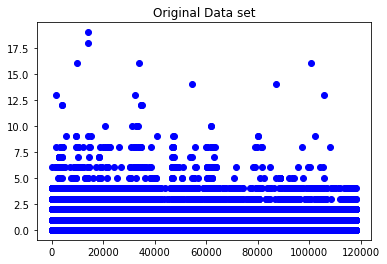

In [47]:
#Lets see the original data
scatter_origianl_data("stays_in_weekend_nights")

IQR 2.0
Max 5.0
Min -3.0
Nulls:  264
%:  0.2233275809562481


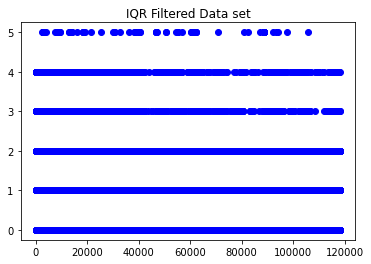

In [48]:
#Lets remove the outliers

outliers("stays_in_weekend_nights",1.5)

##### As we can see 264 elements were remove, or 0.2233 % of the data. 

##### Since we are only missing 0.2233% of the elements, we can remove those rows.

Number of nulls:	 0


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0.0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,2.0,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,2.0,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,2.0,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,2.0,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


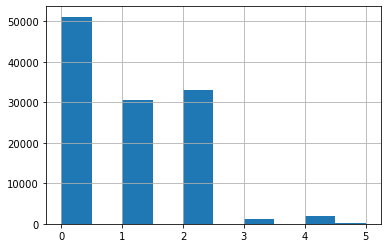

In [49]:
#Now we have some nulls values on the DF, since there are lower than 5 % we can delete them.
df=df.dropna(axis=0,subset=['stays_in_weekend_nights'])

#Lets see if the null have been deleted
print("Number of nulls:\t",df.stays_in_weekend_nights.isnull().sum())
df["stays_in_weekend_nights"].hist()
df

##### There are no more nulls in the data

##### Now we need to normalize the data, since it doesn't follow a Gaussian distribution, we are going to use Min-max normalization

Number of nulls:	 0


<ipython-input-39-e1c996afdcbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=normalization_copy


<AxesSubplot:>

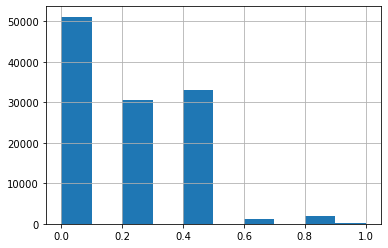

In [50]:
min_max_normalization('stays_in_weekend_nights')

#Lets see if there are any nulls values
print("Number of nulls:\t",df.stays_in_weekend_nights.isnull().sum())
df["stays_in_weekend_nights"].hist()

##### As we can see there are no Null values and the variable is now scale

In [51]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0.0,0,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,1,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,2,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,5,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,5,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable 9: stays_in_week_nights

This variable represents the numbers of days of week(Monday to Friday) that were booked

In [52]:
df.stays_in_week_nights

0         0
2         1
3         1
4         2
5         2
         ..
119385    5
119386    5
119387    5
119388    5
119389    7
Name: stays_in_week_nights, Length: 117948, dtype: int64

In [53]:
print("'stays_in_week_nights' Type:\t",df.stays_in_week_nights.dtypes)
print("Number of nulls:\t",df.stays_in_week_nights.isnull().sum())

'stays_in_week_nights' Type:	 int64
Number of nulls:	 0


2     32960
1     30009
3     22155
5     11044
4      9551
0      7644
6      1499
10     1035
7      1027
8       655
9       231
11       54
12       31
14       28
13       16
15        9
Name: stays_in_week_nights, dtype: int64


<AxesSubplot:>

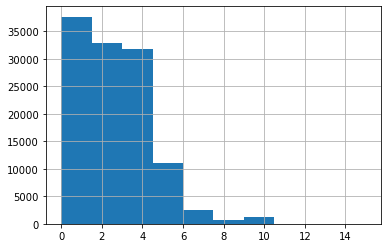

In [54]:
print(df.stays_in_week_nights.value_counts())
df["stays_in_week_nights"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### We need to scale the data, in this case im going to use normalization. Like on variable 8. stays_in_weekend_nights

##### But first we need to check for outliers, get rid of them and the normalize

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea578cb310>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea578cb9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea5784bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea578d70a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea578d73d0>],
 'means': []}

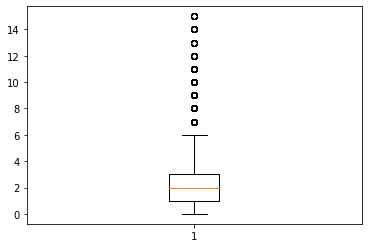

In [55]:
#First lets see a 'box and whisker' graph to find the outliers. As we can see there are a couple of outliers
plt.boxplot(df.stays_in_week_nights)

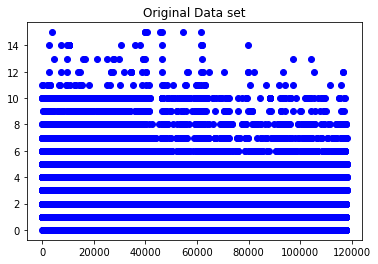

In [56]:
#Lets see the original data
scatter_origianl_data("stays_in_week_nights")

##### Despite that the boxplot show that there are some atypical values, if we see the original data, we found that the maximum number of days(Monday to Friday) book are 15. That’s mean 3 weeks.
##### This may be possible, because there are people who need to be there for multiple weeks for work, conferences ...
##### Because of this, im not going to delete these values. I’m going to continue directly to the 'min-max normalization'


In [57]:
print("Number of nulls:\t",df.stays_in_week_nights.isnull().sum())

Number of nulls:	 0


##### There are no more nulls in the data
##### Now we need to normalize the data, since it doesn't follow a Gaussian distribution, we are going to use Min-max normalization

Number of nulls:	 0


<ipython-input-39-e1c996afdcbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=normalization_copy


<AxesSubplot:>

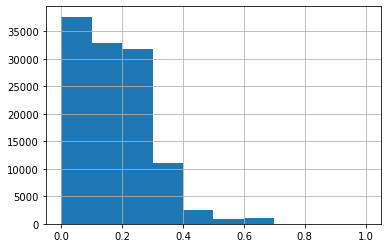

In [58]:
min_max_normalization('stays_in_week_nights')

#Lets see if there are any nulls values
print("Number of nulls:\t",df.stays_in_week_nights.isnull().sum())
df["stays_in_week_nights"].hist()

##### As we can see there are no Null values and the variable is now scale

In [59]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,1,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,2,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,3,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


# Variable 10, 11 & 12: adults, children & babies


This variable represents the numbers of adults, children and babies respectively

In [60]:
df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values]

,adults,children,babies
0,2,0.0,0
2,1,0.0,0
3,1,0.0,0
4,2,0.0,0
5,2,0.0,0
...,...,...,...
119385,2,0.0,0
119386,3,0.0,0
119387,2,0.0,0
119388,2,0.0,0


In [61]:
print("Type:\n",df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].dtypes)
print()
print("Number of nulls:\n",df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].isnull().sum())

Type:
 adults        int64
children    float64
babies        int64
dtype: object

Number of nulls:
 adults      0
children    4
babies      0
dtype: int64


2     88405
1     22871
3      6198
0       396
4        62
26        5
5         2
20        2
27        2
6         1
10        1
40        1
50        1
55        1
Name: adults, dtype: int64

0.0     109364
1.0       4858
2.0       3645
3.0         76
10.0         1
Name: children, dtype: int64

0     117031
1        900
2         15
9          1
10         1
Name: babies, dtype: int64


array([[<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'babies'}>, <AxesSubplot:>]],
      dtype=object)

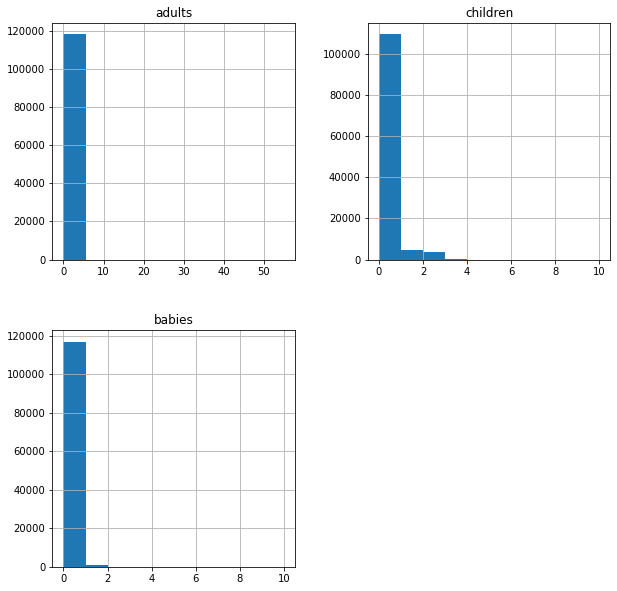

In [62]:
print(df.adults.value_counts())
print()
print(df.children.value_counts())
print()
print(df.babies.value_counts())

df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].hist(figsize=[10,10])


##### As we can see the type of the variable is an 'int' and there are 4 'null' values in children

##### We need to scale the data, in this case im going to use normalization. Like on variable 8. stays_in_weekend_nights, 9. stays_in_week_nights

##### But first we need to check for outliers, treat the missing data, and the normalize

In [63]:
#First I Reallize that there are some rows with 0 adults, 0 childrens and 0 babies, this values make no sence. 
df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].loc[ (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]

,adults,children,babies
2224,0,0.0,0
2409,0,0.0,0
3181,0,0.0,0
3684,0,0.0,0
3708,0,0.0,0
...,...,...,...
115029,0,0.0,0
115091,0,0.0,0
116251,0,0.0,0
116534,0,0.0,0


##### First I Realize that there are some rows with 0 adults, 0 children and 0 babies, this values make no sense.

##### Show i decided to delete this data, as there can't be a booking without someone doing it.

##### Since there were only 173 rows in this case, i decided to delete them

##### There are also 4 nulls value in the children column, since there are so little i delete them

In [64]:
#Lets drop this values
df.drop(df.loc[ (df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index, inplace=True)


#Now we have some nulls values on the DF, since there are lower than 5 % we can delete them.
df=df.dropna(axis=0,subset=['children'])

df.shape

D:\Users\Alex\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(117771, 44)

##### Now we eliminate the outliers

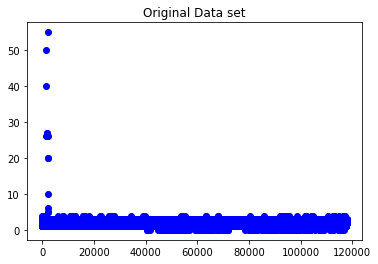

In [65]:
#Lets see the original data
scatter_origianl_data("adults")

##### Now we do the Min-max normalization

Number of nulls:
 adults      0
children    0
babies      0
dtype: int64


<ipython-input-39-e1c996afdcbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=normalization_copy
<ipython-input-39-e1c996afdcbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable]=normalization_copy
<ipython-input-39-e1c996afdcbf>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

array([[<AxesSubplot:title={'center':'adults'}>,
        <AxesSubplot:title={'center':'children'}>],
       [<AxesSubplot:title={'center':'babies'}>, <AxesSubplot:>]],
      dtype=object)

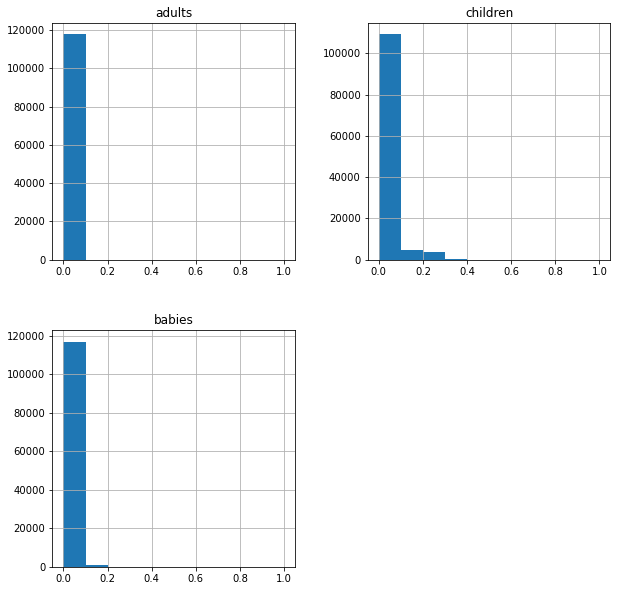

In [66]:
min_max_normalization('adults')
min_max_normalization('children')
min_max_normalization('babies')

#Lets see if there are any nulls values
print("Number of nulls:\n",df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].isnull().sum())
df[df.dtypes[(df.columns=="adults") | (df.columns=="children") | (df.columns=="babies")].index.values].hist(figsize=[10,10])


##### There are no Null values, and the normalization has been completed correctly

In [67]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,0.054545,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


# Variable 13, 14, 15 & 16: meal, country, market_segment & distribution_channel


This variable represents the meal type, country of origin, the market segment that represent the booking and distribution channel that represent the booking respectively

In [68]:
df[df.dtypes[(df.columns=="meal") | (df.columns=="country") | (df.columns=="market_segment") | (df.columns=="distribution_channel")].index.values]

,meal,country,market_segment,distribution_channel
0,BB,PRT,Direct,Direct
2,BB,GBR,Direct,Direct
3,BB,GBR,Corporate,Corporate
4,BB,GBR,Online TA,TA/TO
5,BB,GBR,Online TA,TA/TO
...,...,...,...,...
119385,BB,BEL,Offline TA/TO,TA/TO
119386,BB,FRA,Online TA,TA/TO
119387,BB,DEU,Online TA,TA/TO
119388,BB,GBR,Online TA,TA/TO


In [69]:
print("Type:\n",df[df.dtypes[(df.columns=="meal") | (df.columns=="country") | (df.columns=="market_segment") | (df.columns=="distribution_channel")].index.values].dtypes)
print()
print("Number of nulls:\n",df[df.dtypes[(df.columns=="meal") | (df.columns=="country") | (df.columns=="market_segment") | (df.columns=="distribution_channel")].index.values].isnull().sum())

Type:
 meal                    object
country                 object
market_segment          object
distribution_channel    object
dtype: object

Number of nulls:
 meal                      0
country                 476
market_segment            0
distribution_channel      0
dtype: int64


In [70]:
print(df.meal.value_counts())
print()
print(df.country.value_counts())
print()
print(df.market_segment.value_counts())
print()
print(df.distribution_channel.value_counts())



BB           91088
HB           14201
SC           10521
Undefined     1163
FB             798
Name: meal, dtype: int64

PRT    47459
GBR    11939
FRA    10383
ESP     8559
DEU     7213
       ...  
ATF        1
SMR        1
FJI        1
PYF        1
DMA        1
Name: country, Length: 177, dtype: int64

Online TA        56299
Offline TA/TO    23842
Groups           18840
Direct           12556
Corporate         5272
Complementary      727
Aviation           235
Name: market_segment, dtype: int64

TA/TO        96358
Direct       14585
Corporate     6635
GDS            192
Undefined        1
Name: distribution_channel, dtype: int64


<AxesSubplot:>

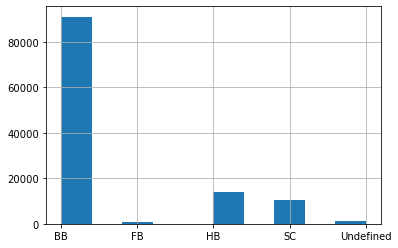

In [71]:
df["meal"].hist()

<AxesSubplot:>

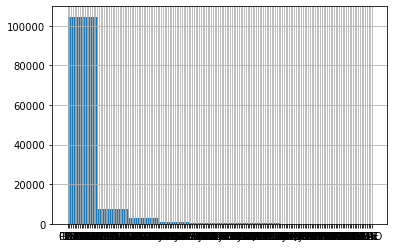

In [72]:
df["country"].hist()

<AxesSubplot:>

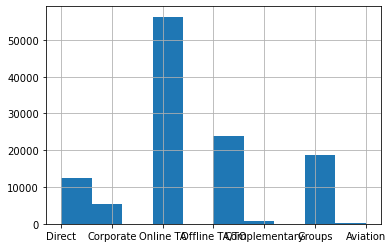

In [73]:
df["market_segment"].hist()

<AxesSubplot:>

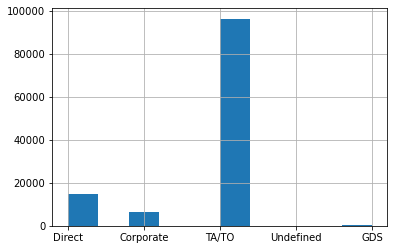

In [74]:
df["distribution_channel"].hist()

##### As we can see the type of the variable is an 'Object' and there are 476 'null' values in country
##### We need to scale the data, in this case im going to use normalization. Like on variable 8. stays_in_weekend_nights, 9. stays_in_week_nights
##### Even Though this column is an object it can be define as a String. That’s mean its a Categorical Data and thus we need to apply some sort of transformation.¶
##### These 4 values are Nominal data, and we cannot apply 'Label encoding'.
##### For that is better to use One-hot encoding, except for the variable Country, because it has 177 different values. So, it will be better to apply another transformation. For that i will be using Base N Encoding, using base 4. That way we can store the variable Country in 4 columns


In [75]:
#Lets transform the variable Country Using Base N Encoding
encoder= ce.BaseNEncoder(cols=['country'],return_df=True,base=4)

df=encoder.fit_transform(df)
df

D:\Users\Alex\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,0.054545,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
#Lets see the results
print("Number of nulls:\n",df.filter(regex=("country")).isnull().sum())
df[df.dtypes[(df.columns=="country_0") | (df.columns=="country_1") | (df.columns=="country_2") | (df.columns=="country_3") | (df.columns=="country_4")].index.values].value_counts()


Number of nulls:
 country_0    0
country_1    0
country_2    0
country_3    0
country_4    0
dtype: int64


country_0  country_1  country_2  country_3  country_4
0          0          0          0          1            47459
                                            2            11939
                                 1          2            10383
                                            0             8559
                                 3          1             7213
                                                         ...  
           1          3          3          2                1
           0          1          3          1                1
           2          0          0          3                1
                                 3          0                1
                      1          3          2                1
Length: 178, dtype: int64

##### Has we can see, there are no 'Nulls values' and the data transformation is completed

##### Now we do the one-hot encoding on the other 3 variables

In [77]:

df=pd.get_dummies(df, columns=["meal", "market_segment", "distribution_channel"], prefix=["meal", "market_segment", "distribution_channel"] )
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,0.036364,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,0.054545,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


Number of nulls:
 meal_BB                           0
meal_FB                           0
meal_HB                           0
meal_SC                           0
meal_Undefined                    0
market_segment_Aviation           0
market_segment_Complementary      0
market_segment_Corporate          0
market_segment_Direct             0
market_segment_Groups             0
market_segment_Offline TA/TO      0
market_segment_Online TA          0
distribution_channel_Corporate    0
distribution_channel_Direct       0
distribution_channel_GDS          0
distribution_channel_TA/TO        0
distribution_channel_Undefined    0
dtype: int64


array([[<AxesSubplot:title={'center':'meal_BB'}>,
        <AxesSubplot:title={'center':'meal_FB'}>,
        <AxesSubplot:title={'center':'meal_HB'}>,
        <AxesSubplot:title={'center':'meal_SC'}>],
       [<AxesSubplot:title={'center':'meal_Undefined'}>,
        <AxesSubplot:title={'center':'market_segment_Aviation'}>,
        <AxesSubplot:title={'center':'market_segment_Complementary'}>,
        <AxesSubplot:title={'center':'market_segment_Corporate'}>],
       [<AxesSubplot:title={'center':'market_segment_Direct'}>,
        <AxesSubplot:title={'center':'market_segment_Groups'}>,
        <AxesSubplot:title={'center':'market_segment_Offline TA/TO'}>,
        <AxesSubplot:title={'center':'market_segment_Online TA'}>],
       [<AxesSubplot:title={'center':'distribution_channel_Corporate'}>,
        <AxesSubplot:title={'center':'distribution_channel_Direct'}>,
        <AxesSubplot:title={'center':'distribution_channel_GDS'}>,
        <AxesSubplot:title={'center':'distribution_channel_T

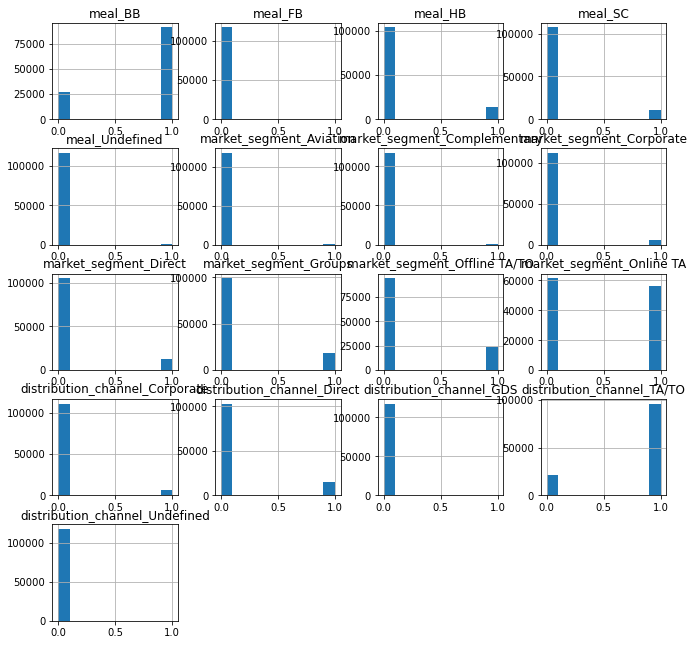

In [78]:
#Now lets check for nulls again, and check the histograms
print("Number of nulls:\n",df.filter(regex=("(meal_|market_segment_|distribution_channel_)")).isnull().sum())
df.filter(regex=("(meal_|market_segment_|distribution_channel_)")).hist(figsize=[11,11])

##### Has we can see the one-hot encoding has been completed, and there are no Null value

# Variable 17: is_repeated_guest


This variable represents if the booking name was from a repeated guest (1) or not (0)

In [79]:
df.is_repeated_guest

0         0
2         0
3         0
4         0
5         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_repeated_guest, Length: 117771, dtype: int64

In [80]:
print("'is_repeated_guest' Type:\t",df.is_repeated_guest.dtypes)
print("Number of nulls:\t",df.is_repeated_guest.isnull().sum())

'is_repeated_guest' Type:	 int64
Number of nulls:	 0


0    114021
1      3750
Name: is_repeated_guest, dtype: int64


<AxesSubplot:>

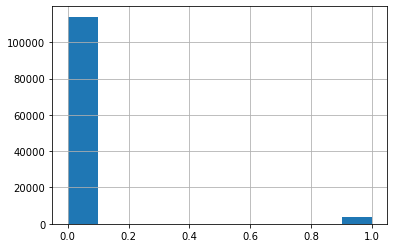

In [81]:
print(df.is_repeated_guest.value_counts())
df["is_repeated_guest"].hist()

##### As we can see the type of the variable is an 'int' and there are no 'null' values.

##### The data have only two values, 0 and 1. So no more operations are needed

# Variable 18 & 19: previous_cancellations & previous_bookings_not_canceled


Number of previous bookings that were cancelled by the customer prior to the current booking

In [82]:
df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values]

,previous_cancellations,previous_bookings_not_canceled
0,0,0
2,0,0
3,0,0
4,0,0
5,0,0
...,...,...
119385,0,0
119386,0,0
119387,0,0
119388,0,0


In [83]:
print("Type:\n",df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values].dtypes)
print()
print("Number of nulls:\n",df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values].isnull().sum())

Type:
 previous_cancellations            int64
previous_bookings_not_canceled    int64
dtype: object

Number of nulls:
 previous_cancellations            0
previous_bookings_not_canceled    0
dtype: int64


0     111317
1       6023
2        114
3         65
24        48
11        35
4         31
26        26
25        25
6         22
5         19
19        19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

0     114164
1       1534
2        579
3        333
4        228
       ...  
38         1
39         1
71         1
41         1
63         1
Name: previous_bookings_not_canceled, Length: 73, dtype: int64


array([[<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>]],
      dtype=object)

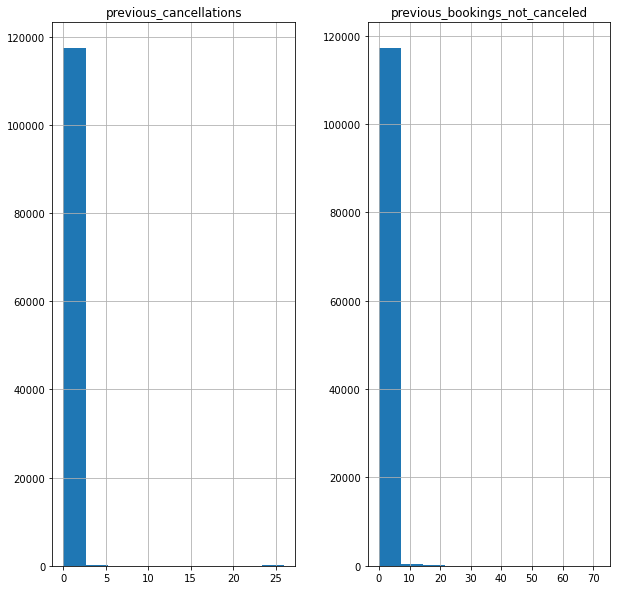

In [84]:
print(df.previous_cancellations.value_counts())
print()
print(df.previous_bookings_not_canceled.value_counts())

df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values].hist(figsize=[10,10])

##### As we can see the type of both variable is an 'int' and there are no 'null' values.

##### We need to scale the data, for that im going to use a min-max normalization. 

##### But first lets check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea5f738e20>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea5f747520>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea5f738a90>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea5f747be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea5f747f40>],
 'means': []}

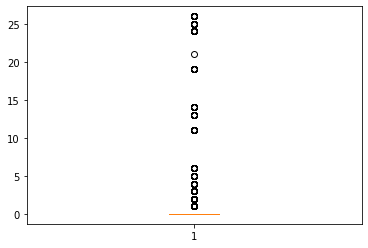

In [85]:
#First lets see a 'box and whisker' graph to find the outliers. As we can see there are a couple of outliers
plt.boxplot(df.previous_cancellations)



{'whiskers': [<matplotlib.lines.Line2D at 0x1ea5f7999d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea5f7a30d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea5f799640>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea5f7a3790>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea5f7a3af0>],
 'means': []}

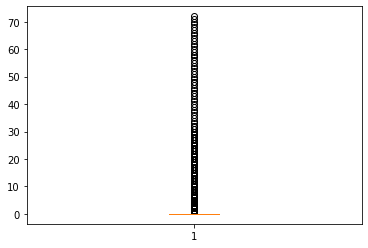

In [86]:
plt.boxplot(df.previous_bookings_not_canceled)

##### As we can see from the box and whisker, since almost all of the data is a 0, the IQR is 0, and thus it thinks that the rest of the values are outliers. For that I decided to not eliminate these values. Since eliminating them means that all the values of the variable will be 0, and would not bring any useful information.  These apply for both variable.

Number of nulls:
 previous_cancellations            0
previous_bookings_not_canceled    0
dtype: int64


array([[<AxesSubplot:title={'center':'previous_cancellations'}>,
        <AxesSubplot:title={'center':'previous_bookings_not_canceled'}>]],
      dtype=object)

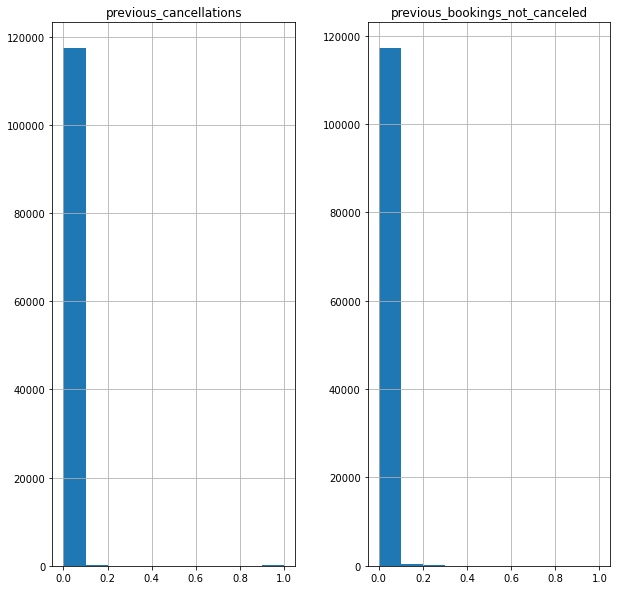

In [87]:

min_max_normalization('previous_cancellations')
min_max_normalization('previous_bookings_not_canceled')

#Lets see if there are any nulls values
#print("Number of nulls:\t",df.previous_cancellations.isnull().sum())
#df["previous_cancellations"].hist()


print("Number of nulls:\n",df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values].isnull().sum())
df[df.dtypes[(df.columns=="previous_cancellations") | (df.columns=="previous_bookings_not_canceled")].index.values].hist(figsize=[10,10])

##### There are no Null values, and the normalization has been completed correctly

In [88]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,market_segment_Corporate,market_segment_Direct,market_segment_Groups,market_segment_Offline TA/TO,market_segment_Online TA,distribution_channel_Corporate,distribution_channel_Direct,distribution_channel_GDS,distribution_channel_TA/TO,distribution_channel_Undefined
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,0.036364,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,1,0,0,0,0,1,0,0,0
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,1,0,0,0,0,1,0,0,0,0
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,0.054545,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0


# Now that we have done some variable one by one, Im going to attack the rest of them together.

##### For that, first I need to know the data Type of each of them. 

##### These variables are:

- 20. reserved_room_type
- 21. assigned_room_type
- 22. booking_changes
- 23. deposit_type
- 24. agent
- 25. company
- 26. days_in_waiting_list
- 27. customer_type
- 28. adr
- 29. required_car_parking_spaces
- 30. total_of_special_requests
- 31. reservation_status
- 32. reservation_status_date

In [89]:
print("Type:\n",df[df.dtypes[(df.columns=="reserved_room_type") | (df.columns=="assigned_room_type") | (df.columns=="booking_changes") | (df.columns=="deposit_type") | (df.columns=="agent") | (df.columns=="company") | (df.columns=="days_in_waiting_list") | (df.columns=="customer_type") | (df.columns=="adr") | (df.columns=="required_car_parking_spaces") | (df.columns=="total_of_special_requests") | (df.columns=="reservation_status") | (df.columns=="reservation_status_date")].index.values].dtypes)


Type:
 reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
agent                          float64
company                        float64
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status              object
reservation_status_date         object
dtype: object


##### Now we know the type of data from each variable, so now we are going to treat the int, and floats separate from the object type. 

# First lets treat the numbers.

##### These variables  are:

- 22. booking_changes
- 24. agent
- 25. company
- 26. days_in_waiting_list
- 28. adr
- 29. required_car_parking_spaces
- 30. total_of_special_requests

##### Now lets see if there are some nulls values and lets see the histograms


In [90]:
print("Number of nulls:\n",df[df.dtypes[(df.columns=="booking_changes") | (df.columns=="agent") | (df.columns=="company") | (df.columns=="days_in_waiting_list") | (df.columns=="adr") | (df.columns=="required_car_parking_spaces") | (df.columns=="total_of_special_requests")].index.values].isnull().sum())

Number of nulls:
 booking_changes                     0
agent                           16229
company                        111013
days_in_waiting_list                0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
dtype: int64


0     99965
1     12553
2      3740
3       906
4       363
5       114
6        58
7        29
8        14
9         8
10        5
13        4
14        3
15        3
16        2
11        1
12        1
17        1
18        1
Name: booking_changes, dtype: int64

9.0      31864
240.0    13898
1.0       6533
14.0      3630
7.0       3532
         ...  
114.0        1
408.0        1
289.0        1
337.0        1
431.0        1
Name: agent, Length: 332, dtype: int64

40.0     924
223.0    784
67.0     267
45.0     249
153.0    213
        ... 
142.0      1
499.0      1
352.0      1
461.0      1
497.0      1
Name: company, Length: 347, dtype: int64

0      114110
39        226
58        164
44        141
31        127
        ...  
36          1
193         1
165         1
74          1
52          1
Name: days_in_waiting_list, Length: 126, dtype: int64

62.00     3407
75.00     2713
65.00     2385
90.00     2341
80.00     1880
          ... 
102.76       1
94.96        1
36.74        1
2

array([[<AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'agent'}>,
        <AxesSubplot:title={'center':'company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

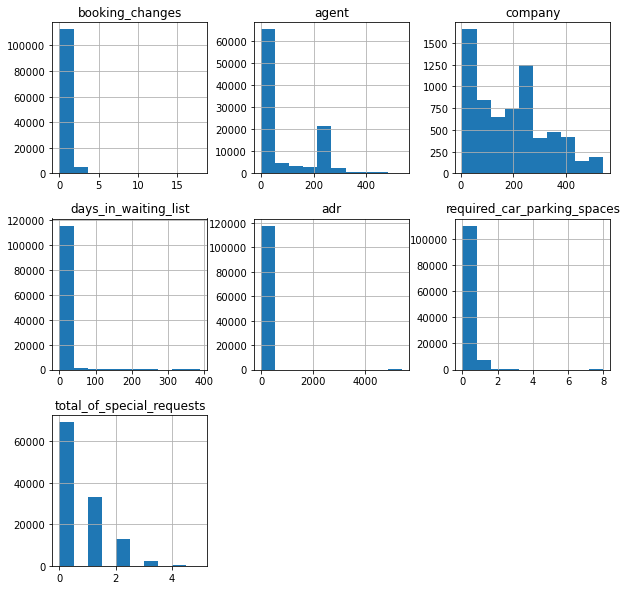

In [91]:
print(df.booking_changes.value_counts())
print()
print(df.agent.value_counts())
print()
print(df.company.value_counts())
print()
print(df.days_in_waiting_list.value_counts())
print()
print(df.adr.value_counts())
print()
print(df.required_car_parking_spaces.value_counts())
print()
print(df.total_of_special_requests.value_counts())

df[df.dtypes[(df.columns=="booking_changes") | (df.columns=="agent") | (df.columns=="company") | (df.columns=="days_in_waiting_list") | (df.columns=="adr") | (df.columns=="required_car_parking_spaces") | (df.columns=="total_of_special_requests")].index.values].hist(figsize=[10,10])

##### First lets treat the nulls values. 
###### 2 Variable have nulls values, 'agent' and 'company'

The % off missing values in these variables is really big, we have 16340 missing values in 'agent' and 112593 missing values in 'company', from a total of 119390 values.

The variable Company has a 94% nulls values. These variables show the ID of the company or entity that book or paid for the booking. So, these null values can represent booking made by individuals. So instead of deleting the column it will be better to transform the entire column

For that I will transform this column into a 'booking_made_by_company', the nulls values will be transformed into a 0, and the rest of the values to 1.

Now we do the same process with the column 'agent', where 14% of data is nulls. The new variable will be name 'booking_made_by_agent'



In [92]:
#Lets modify the data for Company and Agent

df["company"].loc[~df["company"].isnull()] = 1
df["company"].loc[df["company"].isnull()] = 0
df=df.rename(columns={'company': 'booking_made_by_company'})

df["agent"].loc[~df["agent"].isnull()] = 1
df["agent"].loc[df["agent"].isnull()] = 0
df=df.rename(columns={'agent': 'booking_made_by_agent'})

print(df.booking_made_by_company.value_counts())
print(df.booking_made_by_agent.value_counts())

0.0    111013
1.0      6758
Name: booking_made_by_company, dtype: int64
1.0    101542
0.0     16229
Name: booking_made_by_agent, dtype: int64


D:\Users\Alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


##### Now lets treat the other variables. 
##### First lets check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea61a7ad60>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea61a88460>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea61a7aa00>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea61a88b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea61a88e80>],
 'means': []}

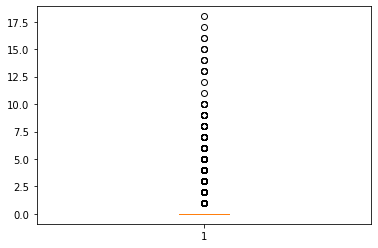

In [93]:

plt.boxplot(df.booking_changes)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea61adbe80>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea61ae8580>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea61adbb20>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea61ae8c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea61ae8fa0>],
 'means': []}

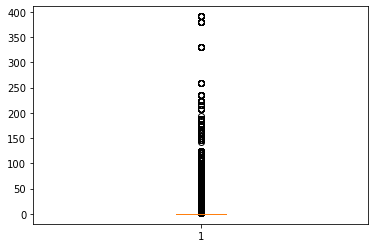

In [94]:
plt.boxplot(df.days_in_waiting_list)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea61b48520>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea61b48be0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea61b481c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea61b552e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea61b55640>],
 'means': []}

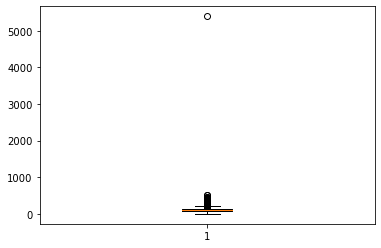

In [95]:
plt.boxplot(df.adr)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea61ba0b50>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea61baf250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea61ba07f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea61baf910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea61bafc70>],
 'means': []}

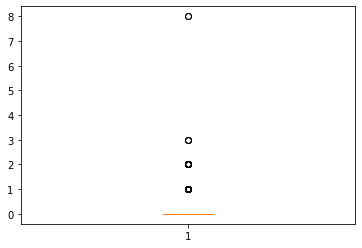

In [96]:
plt.boxplot(df.required_car_parking_spaces)

{'whiskers': [<matplotlib.lines.Line2D at 0x1ea61c0c220>,
 'caps': [<matplotlib.lines.Line2D at 0x1ea61c0c8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ea61c00e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1ea61c0cfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ea61c19340>],
 'means': []}

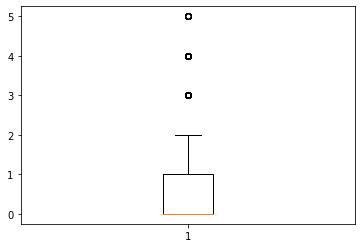

In [97]:
plt.boxplot(df.total_of_special_requests)

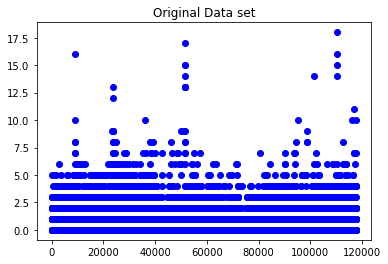

In [98]:
scatter_origianl_data("booking_changes")


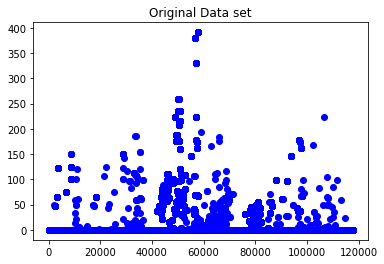

In [99]:
scatter_origianl_data("days_in_waiting_list")

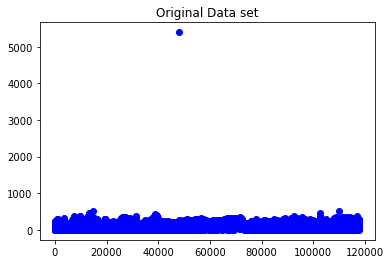

In [100]:
scatter_origianl_data("adr")

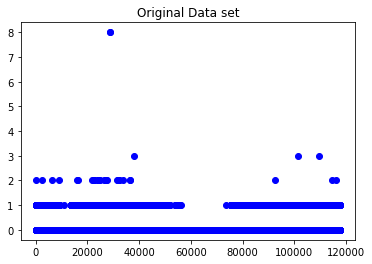

In [101]:
scatter_origianl_data("required_car_parking_spaces")

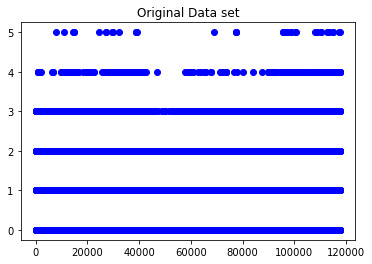

In [102]:
scatter_origianl_data("total_of_special_requests")

##### As we can see, there are a couple of outliers, so we need to treat them

##### As we can see, the main outlier is on variable: 'adr' so we are going to get rid of that one.

For that its easy to use a 10 times IQR.


IQR 56.0
Max 686.0
Min -490.0
Nulls:  1
%:  0.0008491054673901045


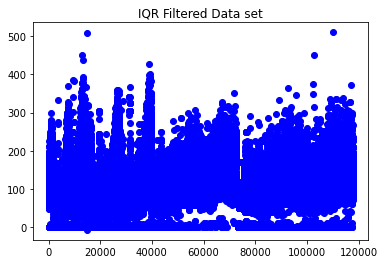

In [103]:
outliers("adr",10)
df=df.dropna(axis=0,subset=['adr'])

##### Now we scale the data. For that we will use the 'min-max normalization'

In [104]:
min_max_normalization('booking_changes')
min_max_normalization('days_in_waiting_list')
min_max_normalization('adr')
min_max_normalization('required_car_parking_spaces')
min_max_normalization('total_of_special_requests')


##### Now lets check all the changes

Number of nulls:
 booking_changes                0
booking_made_by_agent          0
booking_made_by_company        0
days_in_waiting_list           0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64


array([[<AxesSubplot:title={'center':'booking_changes'}>,
        <AxesSubplot:title={'center':'booking_made_by_agent'}>,
        <AxesSubplot:title={'center':'booking_made_by_company'}>],
       [<AxesSubplot:title={'center':'days_in_waiting_list'}>,
        <AxesSubplot:title={'center':'adr'}>,
        <AxesSubplot:title={'center':'required_car_parking_spaces'}>],
       [<AxesSubplot:title={'center':'total_of_special_requests'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

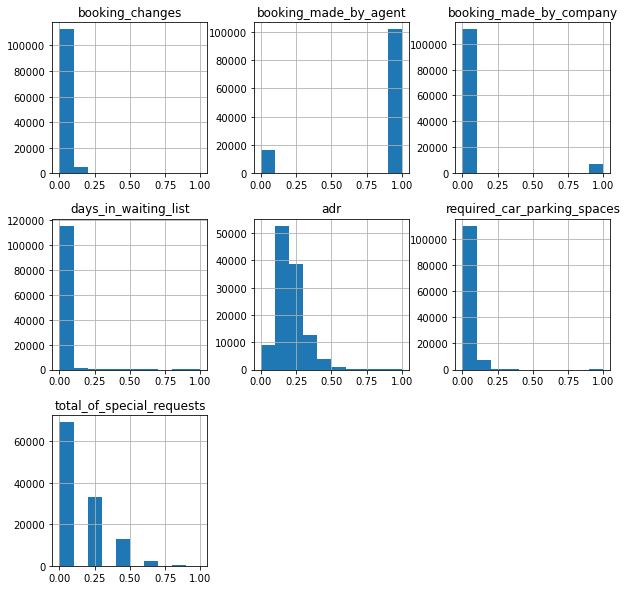

In [105]:
print("Number of nulls:\n",df[df.dtypes[(df.columns=="booking_changes") | (df.columns=="booking_made_by_agent") | (df.columns=="booking_made_by_company") | (df.columns=="days_in_waiting_list") | (df.columns=="adr") | (df.columns=="required_car_parking_spaces") | (df.columns=="total_of_special_requests")].index.values].isnull().sum())
df[df.dtypes[(df.columns=="booking_changes") | (df.columns=="booking_made_by_agent") | (df.columns=="booking_made_by_company") | (df.columns=="days_in_waiting_list") | (df.columns=="adr") | (df.columns=="required_car_parking_spaces") | (df.columns=="total_of_special_requests")].index.values].hist(figsize=[10,10])

##### There are no Null values, and the normalization has been completed correctly


# Now lets treat the other non-numeric variables

##### These variables  are:

- 20. reserved_room_type
- 21. assigned_room_type
- 23. deposit_type
- 27. customer_type
- 31. reservation_status
- 32. reservation_status_date

Now lets see if there are some nulls values and lets see the histograms 

In [106]:
print("Number of nulls:\n",df[df.dtypes[(df.columns=="reserved_room_type") | (df.columns=="assigned_room_type") | (df.columns=="deposit_type") | (df.columns=="customer_type") | (df.columns=="reservation_status") | (df.columns=="reservation_status_date")].index.values].isnull().sum())

Number of nulls:
 reserved_room_type         0
assigned_room_type         0
deposit_type               0
customer_type              0
reservation_status         0
reservation_status_date    0
dtype: int64


In [107]:
print(df.reserved_room_type.value_counts())
print()
print(df.assigned_room_type.value_counts())
print()
print(df.deposit_type.value_counts())
print()
print(df.customer_type.value_counts())
print()
print(df.reservation_status.value_counts())
print()
print(df.reservation_status_date.value_counts())

A    84555
D    19126
E     6465
F     2889
G     2087
B     1111
C      930
H      601
L        6
Name: reserved_room_type, dtype: int64

A    72751
D    25239
E     7740
F     3740
G     2540
C     2363
B     2147
H      712
I      353
K      184
L        1
Name: assigned_room_type, dtype: int64

No Deposit    103832
Non Refund     13776
Refundable       162
Name: deposit_type, dtype: int64

Transient          88488
Transient-Party    24659
Contract            4050
Group                573
Name: customer_type, dtype: int64

Check-Out    74608
Canceled     41970
No-Show       1192
Name: reservation_status, dtype: int64

2015-10-21    925
2015-07-06    804
2016-11-25    790
2015-01-01    763
2016-01-18    624
             ... 
2015-03-29      1
2015-03-13      1
2015-03-12      1
2015-03-11      1
2015-02-06      1
Name: reservation_status_date, Length: 926, dtype: int64


##### As we can see, there are no 'nulls' values.

##### Lets apply one-hot encoding to the variables except for 'reservation_status_date'. Because it is a Date

In [108]:
df=pd.get_dummies(df, columns=["reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"], prefix=["reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status"] )


Number of nulls:
 reservation_status_date          0
reserved_room_type_A             0
reserved_room_type_B             0
reserved_room_type_C             0
reserved_room_type_D             0
reserved_room_type_E             0
reserved_room_type_F             0
reserved_room_type_G             0
reserved_room_type_H             0
reserved_room_type_L             0
assigned_room_type_A             0
assigned_room_type_B             0
assigned_room_type_C             0
assigned_room_type_D             0
assigned_room_type_E             0
assigned_room_type_F             0
assigned_room_type_G             0
assigned_room_type_H             0
assigned_room_type_I             0
assigned_room_type_K             0
assigned_room_type_L             0
deposit_type_No Deposit          0
deposit_type_Non Refund          0
deposit_type_Refundable          0
customer_type_Contract           0
customer_type_Group              0
customer_type_Transient          0
customer_type_Transient-Party    0
re

array([[<AxesSubplot:title={'center':'reserved_room_type_A'}>,
        <AxesSubplot:title={'center':'reserved_room_type_B'}>,
        <AxesSubplot:title={'center':'reserved_room_type_C'}>,
        <AxesSubplot:title={'center':'reserved_room_type_D'}>,
        <AxesSubplot:title={'center':'reserved_room_type_E'}>],
       [<AxesSubplot:title={'center':'reserved_room_type_F'}>,
        <AxesSubplot:title={'center':'reserved_room_type_G'}>,
        <AxesSubplot:title={'center':'reserved_room_type_H'}>,
        <AxesSubplot:title={'center':'reserved_room_type_L'}>,
        <AxesSubplot:title={'center':'assigned_room_type_A'}>],
       [<AxesSubplot:title={'center':'assigned_room_type_B'}>,
        <AxesSubplot:title={'center':'assigned_room_type_C'}>,
        <AxesSubplot:title={'center':'assigned_room_type_D'}>,
        <AxesSubplot:title={'center':'assigned_room_type_E'}>,
        <AxesSubplot:title={'center':'assigned_room_type_F'}>],
       [<AxesSubplot:title={'center':'assigned_room_

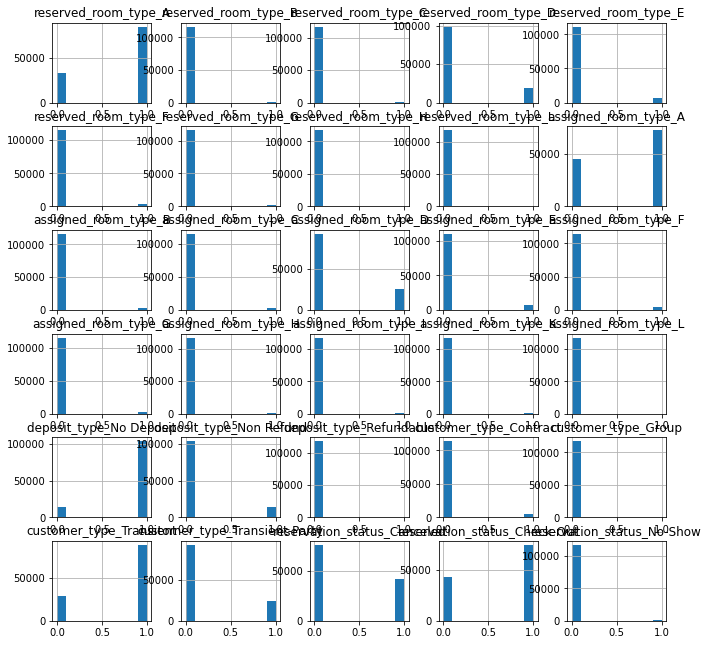

In [109]:
#Now lets check for nulls again, and check the histograms
print("Number of nulls:\n",df.filter(regex=("(reserved_room_type_|assigned_room_type_|deposit_type_|customer_type_|reservation_status_)")).isnull().sum())
df.filter(regex=("(reserved_room_type_|assigned_room_type_|deposit_type_|customer_type_|reservation_status_)")).hist(figsize=[11,11])

##### Has we can see, there are no null values, and the one hot encoding has been applied correctly

##### Now we deal with the reservation_status_date

##### This variable is a date format, for that it will be better to split the variable into Year, month, day

In [110]:
df.reservation_status_date

0         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
5         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 117770, dtype: object

In [111]:
df[['reservation_status_date_year','reservation_status_date_month','reservation_status_date_day']] = df['reservation_status_date'].str.split('-',expand=True)

In [112]:
print("Number of nulls:\n",df.filter(regex=("(reservation_status_date_)")).isnull().sum())
#df.filter(regex=("(reservation_status_date_)")).hist(figsize=[11,11])

print()
print(df.reservation_status_date_year.value_counts())
print()
print(df.reservation_status_date_month.value_counts())
print()
print(df.reservation_status_date_day.value_counts())

Number of nulls:
 reservation_status_date_year     0
reservation_status_date_month    0
reservation_status_date_day      0
dtype: int64

2016    57380
2017    35928
2015    24281
2014      181
Name: reservation_status_date_year, dtype: int64

07    11918
08    11048
01    10635
10    10551
05    10247
03    10131
04     9969
02     9446
09     9284
06     9157
11     8037
12     7347
Name: reservation_status_date_month, dtype: int64

21    4886
06    4757
18    4448
02    4345
09    4266
17    4194
01    4190
25    4090
20    3896
15    3887
12    3821
19    3805
29    3804
28    3788
23    3771
22    3725
24    3702
13    3701
03    3664
16    3644
11    3641
07    3636
04    3629
26    3592
08    3562
05    3519
10    3513
27    3512
14    3451
30    3269
31    2062
Name: reservation_status_date_day, dtype: int64


##### As we can see, there are no Null values, and there are 3 new columns


In [113]:
print("Original data ",df_original.shape)
print("PreProcess data ",df.shape)

Original data  (119390, 32)
PreProcess data  (117770, 90)


##### We can see the end result is a DF with 90 variables and 117770 rows.

##### 58 new columns have been created, and 1620 rows have been deleted, as a result  of the multiples operation we have done

##### The changes of the variables have been explained  along this file.

In [114]:
df_original

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [115]:
df

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show,reservation_status_date_year,reservation_status_date_month,reservation_status_date_day
0,0,0.770270,2015,-0.009804,0.000000,0.0,0.000000,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2015,07,01
2,0,0.015766,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,1,0,0,1,0,2015,07,02
3,0,0.029279,2015,-0.009804,0.000000,0.0,0.066667,0.018182,0.0,0.0,...,0,0,1,0,0,1,0,2015,07,02
4,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2015,07,03
5,0,0.031532,2015,-0.009804,0.000000,0.0,0.133333,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2015,07,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0.051802,2017,0.578596,0.966667,0.4,0.333333,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2017,09,06
119386,0,0.229730,2017,0.578596,1.000000,0.4,0.333333,0.054545,0.0,0.0,...,0,0,1,0,0,1,0,2017,09,07
119387,0,0.076577,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2017,09,07
119388,0,0.245495,2017,0.578596,1.000000,0.4,0.333333,0.036364,0.0,0.0,...,0,0,1,0,0,1,0,2017,09,07
